In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import mean_squared_error
import math
from sklearn.linear_model import LinearRegression

#Data=pd.read_csv('/Users/juyoung/Desktop/빅데이터프로그래밍/프로젝트/data/depression.csv',encoding='utf-8')
Data=pd.read_csv('/Users/Juyoung/Desktop/BigdataProgramming-main/프로젝트/data/depression.csv',encoding='utf-8')
Data=Data[Data['Code']=='v']
Data=Data.dropna(axis=0)
Data=Data.reset_index()
Data


,index,Entity,Code,Year,depression_percent,Real_house_price,Percentage_change_PIR,Safety,Working_age_popul,Elderly_popul,Working_hours,Unemploy_rate,Employ_rate,Gini_coff
0,0,Australia,v,2017,4.623881,102.2,8.3,63.0,65.5,15.7,1712.0,6.498750,74.275,0.325
1,1,Austria,v,2017,3.260970,117.9,5.3,81.0,66.8,18.8,1501.0,5.333500,73.575,0.280
2,2,Belgium,v,2017,4.109186,106.4,3.6,70.0,64.2,18.8,1583.0,5.550000,65.300,0.258
3,3,Canada,v,2017,3.988792,123.4,12.1,82.0,66.7,17.2,1670.0,9.600000,74.150,0.303
4,4,Chile,v,2017,4.057723,111.3,6.7,48.0,68.7,11.5,1914.0,10.765000,64.125,0.460
5,5,Czech Republic,v,2017,2.675387,131.0,11.7,72.0,64.8,19.4,1788.0,2.558250,75.150,0.249
6,6,Denmark,v,2017,3.291885,114.3,4.5,84.0,64.0,19.5,1380.0,5.641750,75.050,0.264
7,7,Estonia,v,2017,3.848854,112.4,5.5,69.0,64.0,19.7,1711.0,6.766500,75.275,0.305
8,8,Finland,v,2017,4.792736,101.1,1.6,85.0,62.3,21.6,1540.0,7.783250,72.975,0.269
9,9,France,v,2017,4.253807,106.8,3.0,71.0,62.1,19.8,1505.0,8.050000,65.550,0.301


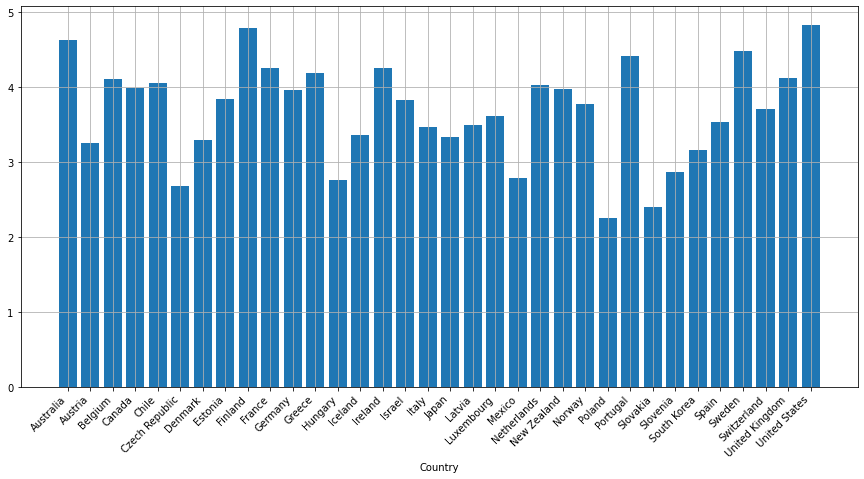

In [5]:
plt.figure(figsize=(15,7))
plt.bar(Data['Entity'],Data['depression_percent'])
plt.grid(True)
plt.xlabel('Country')
plt.xticks(rotation=45, ha='right')
plt.show()

In [63]:
def Make_data(dataframe, data):
    dataframe=dataframe.sort_values(by=data)
    dataframe=dataframe.reset_index()
    return dataframe

def Make_plt(dataframe,data):
    #plt.plot(dataframe[data],dataframe['depression_percent'],'o',color='cornflowerblue',label=dataframe)
    sns.lmplot(x=data , y="depression_percent", height=10,data=dataframe)

def Make_linear(dataframe,data):
    linear=LinearRegression()
    linear.fit(dataframe[data].values.reshape(-1,1),dataframe['depression_percent'])
    pred=linear.predict(dataframe[data].values.reshape(-1,1))
    plt.plot(dataframe[data],linear.predict(dataframe[data].values.reshape(-1,1)),color='red')

    print('Score : ', linear.score(dataframe[data].values.reshape(-1,1),dataframe['depression_percent']))
    print('RMSE : ', mean_squared_error(pred, dataframe['depression_percent'])**0.5)
    print('MSE : ', mean_squared_error(pred, dataframe['depression_percent']),'\n')
    
    print("기울기 : ",linear.coef_)
    print("절편 : ",linear.intercept_,"\n\n")
    
def Pearson_corr(dataframe,data):
    body=pd.DataFrame({'depression_percent':dataframe['depression_percent'],data:dataframe[data]})

    pearson_corr=body.corr(method='pearson')
    print('pearson_corr : {}\n\n'.format(pearson_corr))

# Change rate PIR

<Figure size 1008x1008 with 0 Axes>

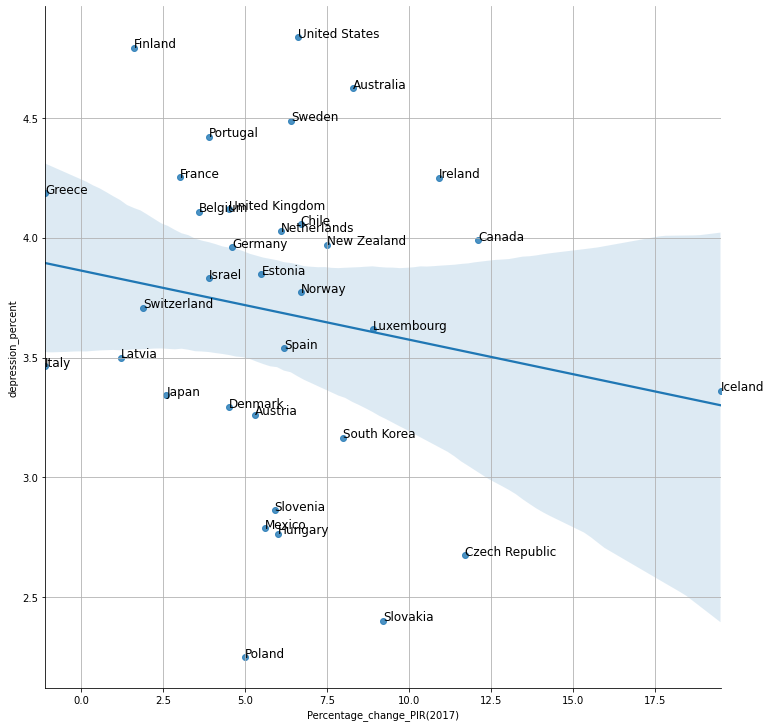

total_PIR_corr : SpearmanrResult(correlation=-0.12287941885382471, pvalue=0.48872733167229654)


In [55]:
plt.figure(figsize=(14,14))

data='Percentage_change_PIR'

PIR_data=Make_data(Data,data)
Make_plt(PIR_data,data)
for i, txt in enumerate(PIR_data['Entity']):
    plt.gca().annotate(txt, (PIR_data[data][i], PIR_data['depression_percent'][i]),size=12)

#Make_name(PIR_data,data)

#Make_linear(PIR_data,data)

plt.xlabel('Percentage_change_PIR(2017)')
plt.ylabel('depression_percent')
plt.grid(True)
plt.show()

PIR_body=pd.DataFrame({'depression_percent':PIR_data['depression_percent'],'PIR':PIR_data[data]})
PIR_corr=stats.spearmanr(PIR_body.PIR,PIR_body.depression_percent)
print('total_PIR_corr : {}'.format(PIR_corr))

# house_price

<Figure size 1008x1008 with 0 Axes>

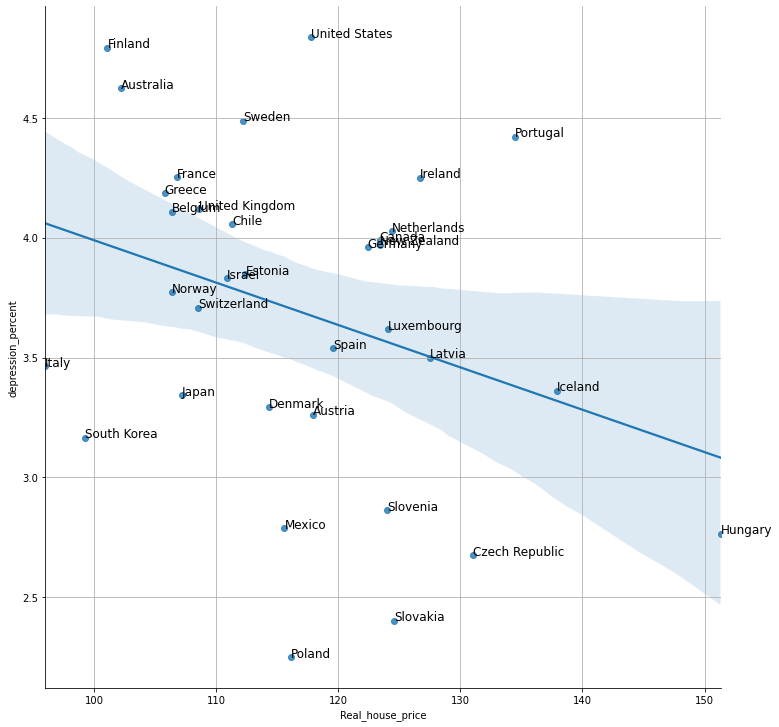

total_Real_house_price_corr : SpearmanrResult(correlation=-0.29584352423658034, pvalue=0.0893588040015231)


In [57]:
plt.figure(figsize=(14,14))

data='Real_house_price'

Real_house_price_data=Make_data(Data,data)
#Make_name(PIR_data,data)
Make_plt(Real_house_price_data,data)
#Make_linear(PIR_data,data)\
for i, txt in enumerate(Real_house_price_data['Entity']):
    plt.gca().annotate(txt, (Real_house_price_data[data][i], Real_house_price_data['depression_percent'][i]),size=12)


plt.xlabel('Real_house_price')
plt.ylabel('depression_percent')
plt.grid(True)
plt.show()

Real_house_price_body=pd.DataFrame({'depression_percent':Real_house_price_data['depression_percent'],'Real_house_price':Real_house_price_data[data]})
Real_house_price_corr=stats.spearmanr(Real_house_price_body.Real_house_price,Real_house_price_body.depression_percent)
print('total_Real_house_price_corr : {}'.format(Real_house_price_corr))

# Safety

<Figure size 1008x1008 with 0 Axes>

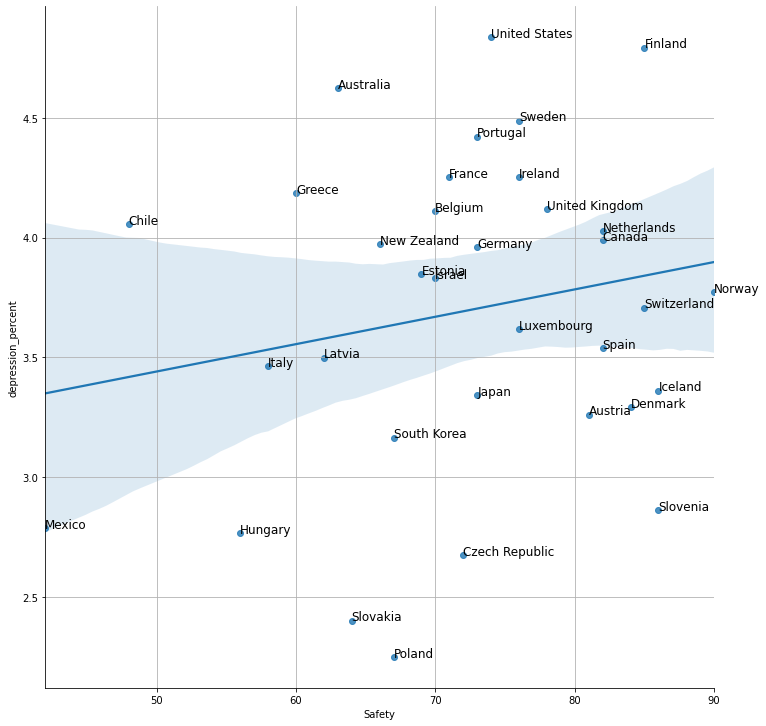

Safety_corr : SpearmanrResult(correlation=0.1251339471557921, pvalue=0.48072489794094597)


In [58]:
plt.figure(figsize=(14,14))

data='Safety'

Safety_data=Make_data(Data,data)
#Make_name(PIR_data,data)
Make_plt(Safety_data,data)
#Make_linear(PIR_data,data)
for i, txt in enumerate(Safety_data['Entity']):
    plt.gca().annotate(txt, (Safety_data[data][i], Safety_data['depression_percent'][i]),size=12)


plt.xlabel('Safety')
plt.ylabel('depression_percent')
plt.grid(True)
plt.show()

Safety_body=pd.DataFrame({'depression_percent':Safety_data['depression_percent'],'Safety':Safety_data[data]})
Safety_corr=stats.spearmanr(Safety_body.Safety,Safety_body.depression_percent)
print('Safety_corr : {}'.format(Safety_corr))

# Elder/Working

<Figure size 1008x1008 with 0 Axes>

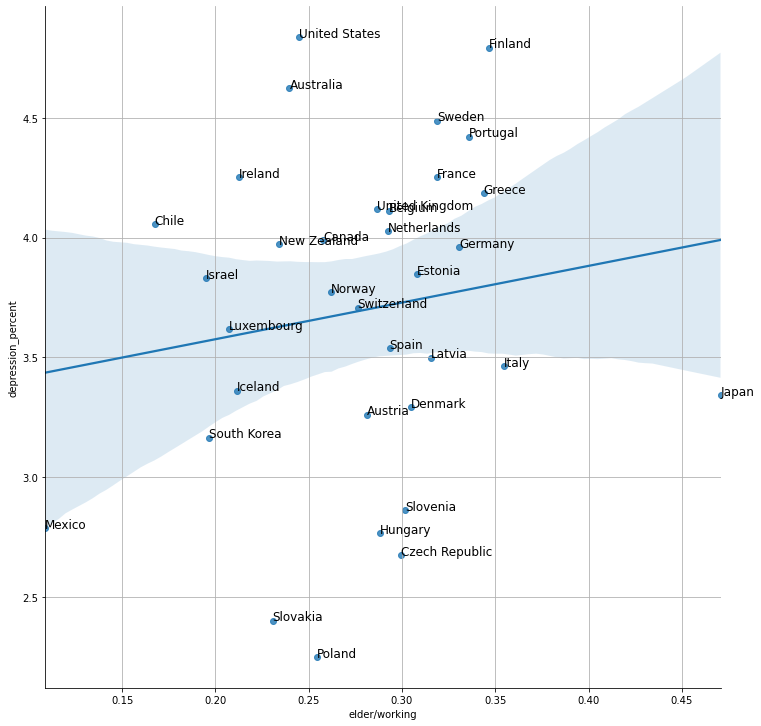

elder/working_corr : SpearmanrResult(correlation=0.18349885408708938, pvalue=0.29889543853741474)


In [59]:
plt.figure(figsize=(14,14))

Data['elder/working']=Data['Elderly_popul']/Data['Working_age_popul']

data='elder/working'

we_data=Make_data(Data,data)
#Make_name(PIR_data,data)
Make_plt(we_data,data)
for i, txt in enumerate(we_data['Entity']):
    plt.gca().annotate(txt, (we_data[data][i], we_data['depression_percent'][i]),size=12)

#Make_linear(PIR_data,data)

plt.xlabel('elder/working')
plt.ylabel('depression_percent')
plt.grid(True)
plt.show()

we_body=pd.DataFrame({'depression_percent':we_data['depression_percent'],'we':we_data[data]})
we_corr=stats.spearmanr(we_body.we,we_body.depression_percent)
print('elder/working_corr : {}'.format(we_corr))

# Working_hours

<Figure size 1008x1008 with 0 Axes>

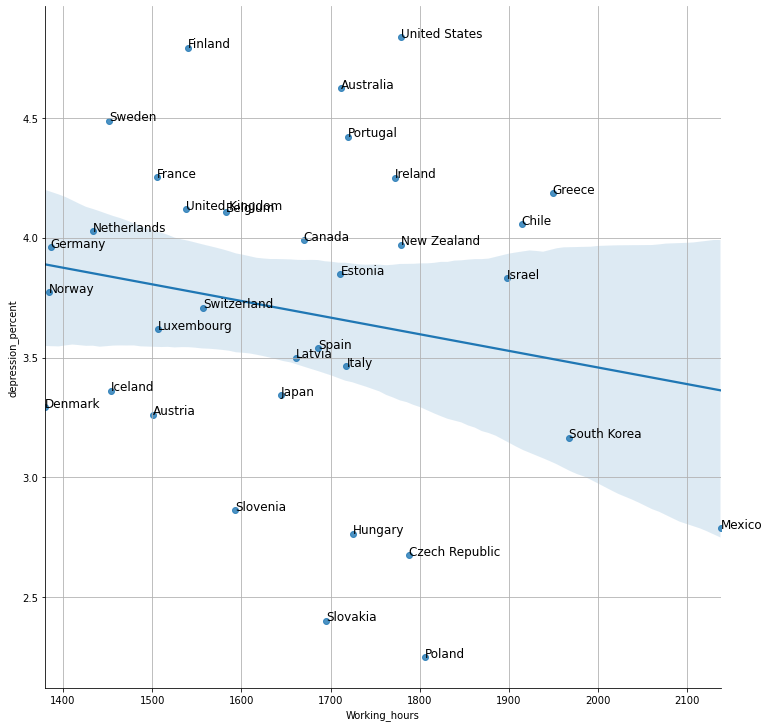

Working_hours_corr : SpearmanrResult(correlation=-0.1240736499915666, pvalue=0.48447992428424624)


In [60]:
plt.figure(figsize=(14,14))

data='Working_hours'

Working_hours_data=Make_data(Data,data)
#Make_name(PIR_data,data)
Make_plt(Working_hours_data,data)
#Make_linear(PIR_data,data)
for i, txt in enumerate(Working_hours_data['Entity']):
    plt.gca().annotate(txt, (Working_hours_data[data][i], Working_hours_data['depression_percent'][i]),size=12)


plt.xlabel('Working_hours')
plt.ylabel('depression_percent')
plt.grid(True)
plt.show()

Working_hours_body=pd.DataFrame({'depression_percent':Working_hours_data['depression_percent'],'Working_hours':Working_hours_data[data]})
Working_hours_corr=stats.spearmanr(Working_hours_body.Working_hours,Working_hours_body.depression_percent)
print('Working_hours_corr : {}'.format(Working_hours_corr))

# Employ_rate

<Figure size 1008x1008 with 0 Axes>

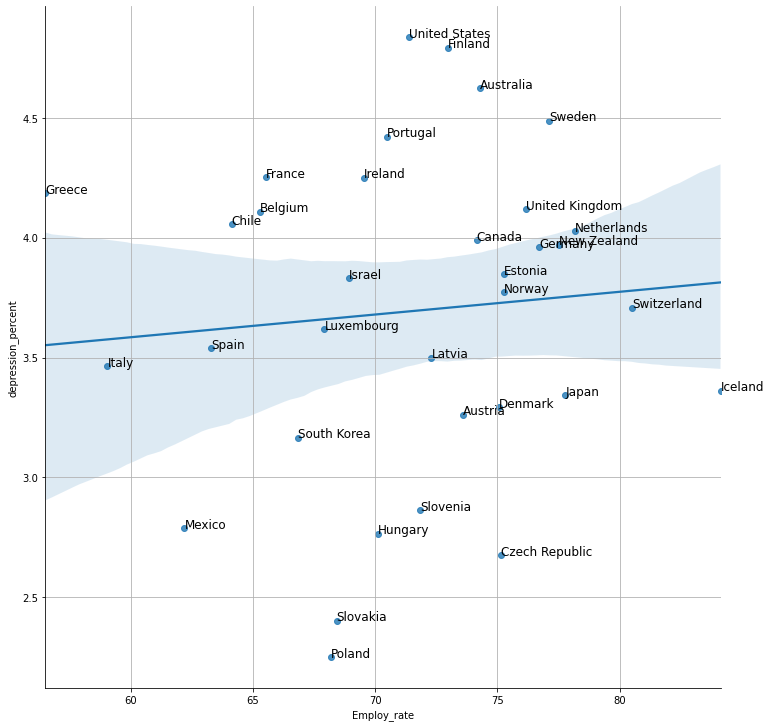

Employ_rate_corr : SpearmanrResult(correlation=0.0796088320758697, pvalue=0.654482422875289)


In [61]:
plt.figure(figsize=(14,14))

data='Employ_rate'

Employ_rate_data=Make_data(Data,data)
#Make_name(PIR_data,data)
Make_plt(Employ_rate_data,data)
#Make_linear(PIR_data,data)
for i, txt in enumerate(Employ_rate_data['Entity']):
    plt.gca().annotate(txt, (Employ_rate_data[data][i], Employ_rate_data['depression_percent'][i]),size=12)

plt.xlabel('Employ_rate')
plt.ylabel('depression_percent')
plt.grid(True)
plt.show()

Employ_rate_body=pd.DataFrame({'depression_percent':Employ_rate_data['depression_percent'],'Employ_rate':Employ_rate_data[data]})
Employ_rate_corr=stats.spearmanr(Employ_rate_body.Employ_rate,Employ_rate_body.depression_percent)
print('Employ_rate_corr : {}'.format(Employ_rate_corr))

# Gini_coff

<Figure size 1008x1008 with 0 Axes>

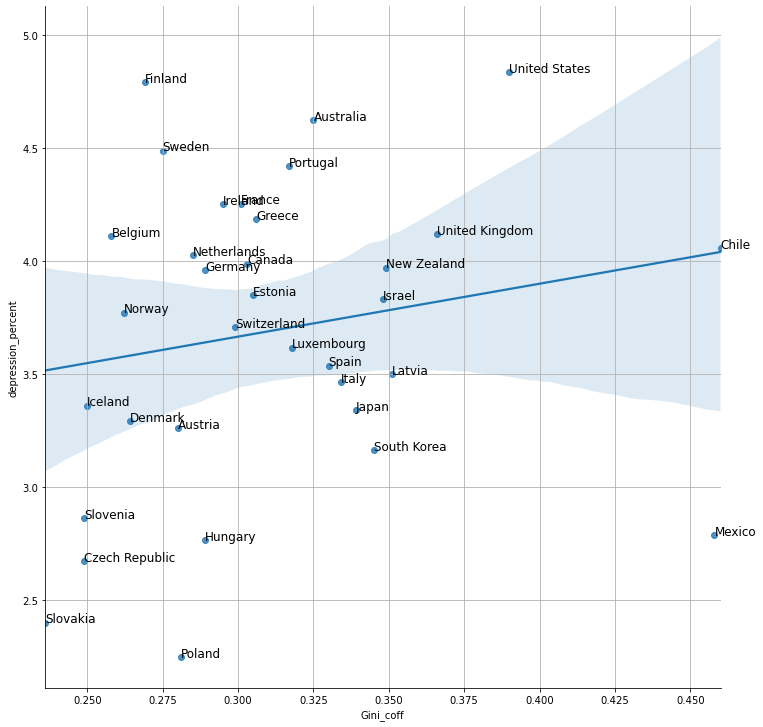

Gini_coff_corr : SpearmanrResult(correlation=0.24602689773806524, pvalue=0.16074270262047272)


In [62]:
plt.figure(figsize=(14,14))

data='Gini_coff'

Gini_coff_data=Make_data(Data,data)
#Make_name(PIR_data,data)
Make_plt(Gini_coff_data,data)
#Make_linear(PIR_data,data)
for i, txt in enumerate(Gini_coff_data['Entity']):
    plt.gca().annotate(txt, (Gini_coff_data[data][i], Gini_coff_data['depression_percent'][i]),size=12)

plt.xlabel('Gini_coff')
plt.ylabel('depression_percent')
plt.grid(True)
plt.show()

Gini_coff_body=pd.DataFrame({'depression_percent':Gini_coff_data['depression_percent'],'Gini_coff':Gini_coff_data[data]})
Gini_coff_corr=stats.spearmanr(Gini_coff_body.Gini_coff,Gini_coff_body.depression_percent)
print('Gini_coff_corr : {}'.format(Gini_coff_corr))

In [30]:
index_list=['PIR','House_price','Safety','Working/elder','Working_housrs','Employ_rate','Gini_coff']
total_corr=['-0.12287941885382471','-0.29584352423658034','0.1251339471557921','0.18349885408708938','-0.1240736499915666','0.0796088320758697','0.24602689773806524']
total_pvalue=['0.48872733167229654','0.0893588040015231','0.48072489794094597','0.29889543853741474','0.48447992428424624','0.654482422875289','0.16074270262047272']

bar_dict={'list':index_list,'total_corr':total_corr,'total_p':total_pvalue}

In [42]:
bar=pd.DataFrame(bar_dict)
bar

,list,total_corr,total_p
0,PIR,-0.12287941885382471,0.48872733167229654
1,House_price,-0.29584352423658034,0.0893588040015231
2,Safety,0.1251339471557921,0.48072489794094597
3,Working/elder,0.18349885408708938,0.29889543853741474
4,Working_housrs,-0.1240736499915666,0.48447992428424624
5,Employ_rate,0.0796088320758697,0.654482422875289
6,Gini_coff,0.24602689773806524,0.16074270262047272


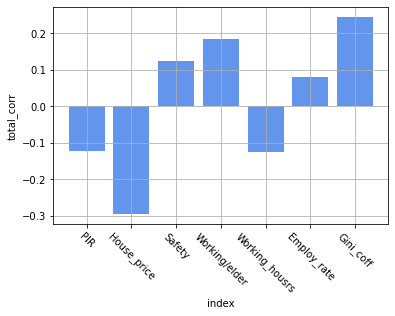

In [44]:
for i in range(len(bar)):
    plt.bar(bar['list'][i],float(bar['total_corr'][i]),color='cornflowerblue')
plt.grid(True)
plt.xlabel('index')
plt.ylabel('total_corr')
plt.xticks(rotation = - 45)
plt.show()